<a href="https://colab.research.google.com/github/Saurav1934/Iris-main/blob/main/Iris_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].value_counts()
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: >

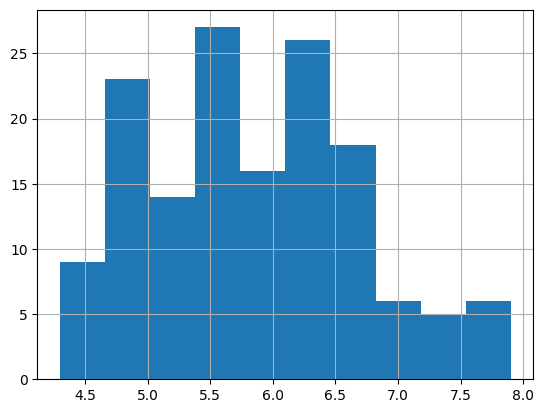

In [ ]:
df['sepal_length'].hist()

<Axes: >

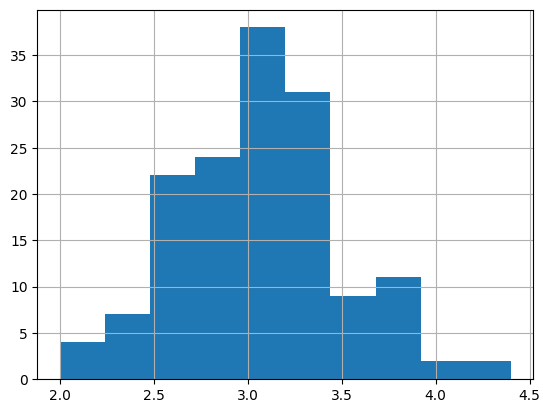

In [ ]:
df['sepal_width'].hist()

<Axes: >

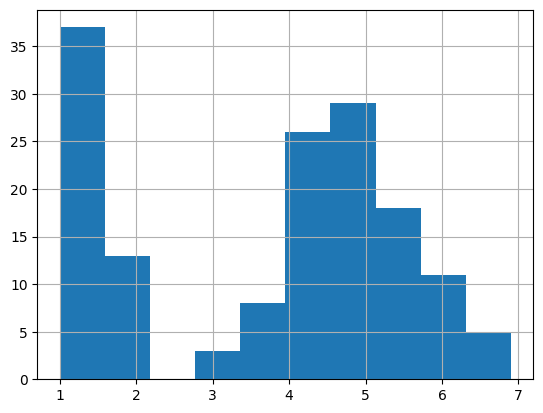

In [ ]:
df['petal_length'].hist()

<Axes: >

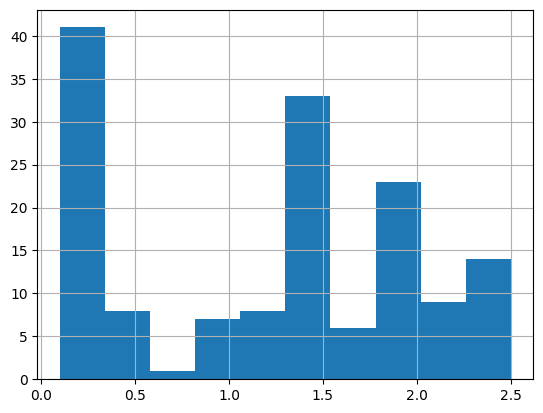

In [ ]:
df['petal_width'].hist()

In [ ]:
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

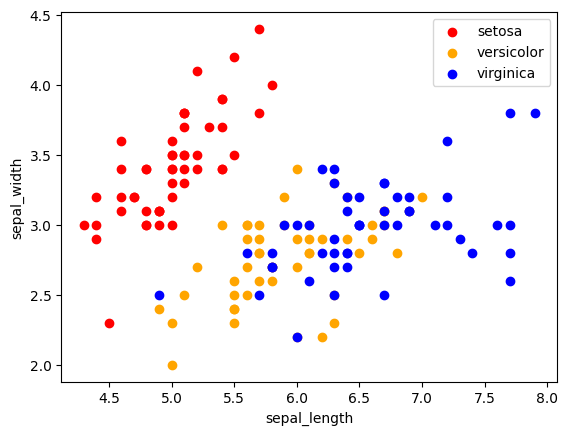

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
  plt.xlabel('sepal_length')
  plt.ylabel('sepal_width')
  plt.legend() ## it will display the classes

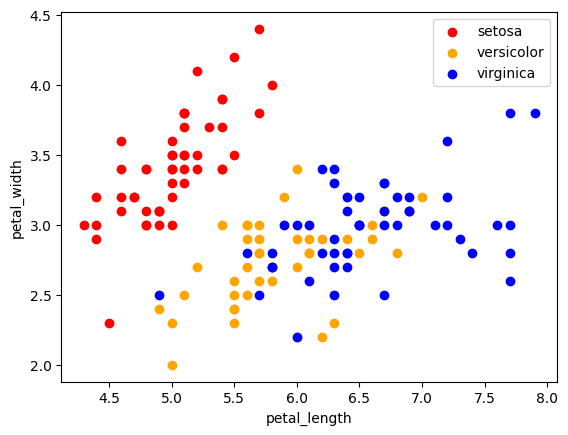

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.legend() ## it will display the classes

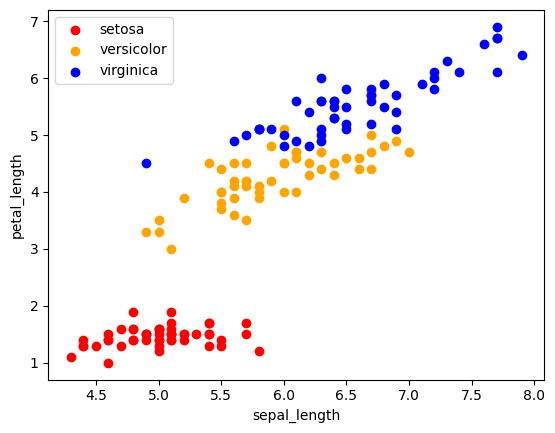

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
  plt.xlabel('sepal_length')
  plt.ylabel('petal_length')
  plt.legend() ## it will display the classes

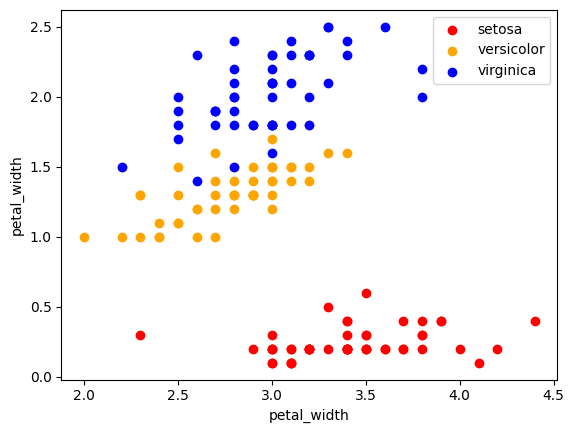

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
  plt.xlabel('petal_width')
  plt.ylabel('petal_width')
  plt.legend() ## it will display the classes

In [ ]:
# Select only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

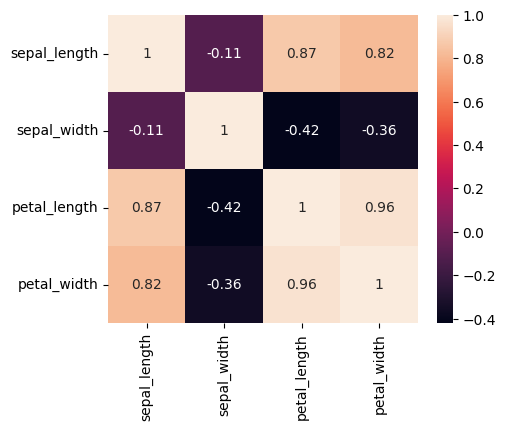

In [ ]:
## making of heat map
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax)

In [ ]:
##from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['species'] = le.fit_transform(df['species'])
#df.head()

In [ ]:
## model training
from sklearn.model_selection import train_test_split
## train = 70
## test = 30
X = df.drop(columns=['species']) # Change 'Species' to 'species'
Y = df['species'] # Change 'Species' to 'species'
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
## print metric to get performance
print('Accuracy:',model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [ ]:
## knn --- k-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Accuracy:',model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [ ]:
## decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Accuracy:',model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [ ]:
import pickle # Corrected the module name to 'pickle'
file = 'savemodel.pkl'
pickle.dump(model,open(file,'wb')) # Changed filename to file

In [ ]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
124,6.7,3.3,5.7,2.1
26,5.0,3.4,1.6,0.4
97,6.2,2.9,4.3,1.3
126,6.2,2.8,4.8,1.8


In [ ]:
load_model = pickle.load(open(file,'rb')) #

In [ ]:
load_model.predict([[6.0,2.2,4.0,1.0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)